In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

df = pd.read_csv('data\\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
#클래스 범주 비율 - value_counts() 사용
print(df['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [77]:
#특성들의 데이터타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
#confusion matrix, 정확도, 정밀도, 재현율, f1, ROC_AUC 출력해주는 함수)
def get_clf_eval(y_test, pred=None, pred_proba=None):
    #오차행렬
    matrix = confusion_matrix(y_test, pred)
    print('오차행렬:\n', matrix)
    
    #정확도
    accuracy = accuracy_score(y_test, pred)
    
    #정밀도
    precision = precision_score(y_test, pred)
    
    #재현율
    recall = recall_score(y_test, pred)
    
    #f1
    f1 = f1_score(y_test, pred)
    
    #ROC_AUC
    ra_score = roc_auc_score(y_test, pred_proba)
    
    #출력
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, ra_score))

In [80]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬:
 [[83 13]
 [26 32]]
정확도:0.7468, 정밀도:0.7111, 재현율: 0.5517, F1:0.6214, AUC:0.8107


In [144]:
#정밀도 재현율 곡선을 확인하여 임계값별 정밀도와 재현율 값의 변화 확인
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precision, recall, threshold = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행 - 정밀도는 점선으로 표시
    plt.figure(figsize=(10,6))
    plt.plot(threshold, precision[:-1], label='precision', ls='--')
    plt.plot(threshold, recall[:-1], label='recall')
    
    #threshold 값 X축의 Scale을 0.1 단위로 변경
    ticks = np.arange(0, 1.1, 0.1)
    plt.xticks(ticks)
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.title('Threshold-Precision & Recall Curve')
    plt.xlabel("Threshold")
    plt.ylabel("Precision & Recall")
    plt.legend(loc='lower left')
    plt.grid(True)
    
    plt.show()

In [148]:
#바로 위 def 다른 방법

#함수 정의 - 정밀도 재현율 곡선을 확인하여 임계값별 정밀도와 재현율 값의 변화 시각화
def precision_recall_curve_plot_2(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(10,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

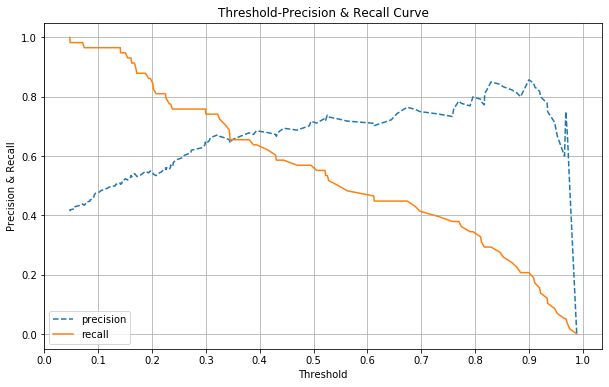

In [149]:
precision_recall_curve_plot(y_test, pred_proba)

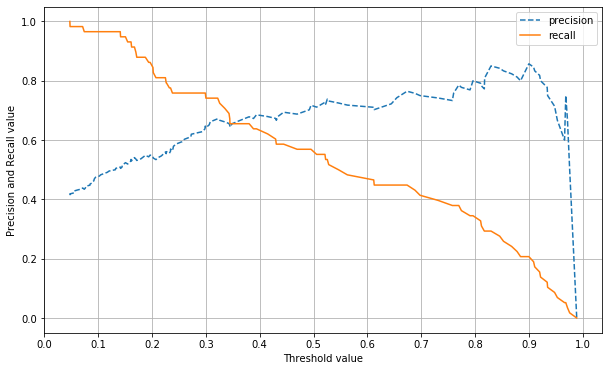

In [150]:
precision_recall_curve_plot_2(y_test, pred_proba)

In [151]:
#데이터의 통계값 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


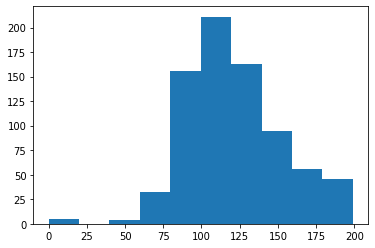

In [154]:
plt.hist(df['Glucose'], bins=10)
plt.show()

In [156]:
#0값 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#전체 데이터 건수
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[ df[feature] == 0 ][feature].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0건수는 5, 퍼센트는 0.65%
BloodPressure 0건수는 35, 퍼센트는 4.56%
SkinThickness 0건수는 227, 퍼센트는 29.56%
Insulin 0건수는 374, 퍼센트는 48.70%
BMI 0건수는 11, 퍼센트는 1.43%


In [158]:
#zero_features 리스트 내부에 저장된 개별 특성들의 0값을 평균값으로 대체
df[zero_features] = df[zero_features].replace(0,df[zero_features].mean())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [159]:
#로지스틱 회귀의 경우 숫자 데이터에 대해 스케일링을 적용하는 것이 모델 생성에 더 좋음
#방금 0제거 해줬으니 다시 X,y로 나눠줌
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#표준화 스케일링 적용 - StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

In [160]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)
#아까보다 좀 오름

오차행렬:
 [[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율: 0.6111, F1:0.6804, AUC:0.8433


In [177]:
#분류 결정 임계값(0.3 ~ 0.5)을 0.03씩 변화시키면서 재현율 값의 성능 수치 개선 확인
from sklearn.preprocessing import Binarizer

def get_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
    for th in thresholds:
        binarizer = Binarizer(threshold=th).fit(pred_proba_c1)
        #threshold=th 부분의 값만 for문 돌며 바뀜
        custom_pred = binarizer.transform(pred_proba_c1)
        #바뀌는 값에 따라 예측도 바뀜
        
        print('임계값:', th)
        
        get_clf_eval(y_test, custom_pred, pred_proba_c1)

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

In [178]:
get_eval_by_thresholds(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.3
오차행렬:
 [[67 33]
 [11 43]]
정확도:0.7143, 정밀도:0.5658, 재현율: 0.7963, F1:0.6615, AUC:0.8433
임계값: 0.33
오차행렬:
 [[72 28]
 [12 42]]
정확도:0.7403, 정밀도:0.6000, 재현율: 0.7778, F1:0.6774, AUC:0.8433
임계값: 0.36
오차행렬:
 [[76 24]
 [15 39]]
정확도:0.7468, 정밀도:0.6190, 재현율: 0.7222, F1:0.6667, AUC:0.8433
임계값: 0.39
오차행렬:
 [[78 22]
 [16 38]]
정확도:0.7532, 정밀도:0.6333, 재현율: 0.7037, F1:0.6667, AUC:0.8433
임계값: 0.42
오차행렬:
 [[84 16]
 [18 36]]
정확도:0.7792, 정밀도:0.6923, 재현율: 0.6667, F1:0.6792, AUC:0.8433
임계값: 0.45
오차행렬:
 [[85 15]
 [18 36]]
정확도:0.7857, 정밀도:0.7059, 재현율: 0.6667, F1:0.6857, AUC:0.8433
임계값: 0.48
오차행렬:
 [[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율: 0.6481, F1:0.6931, AUC:0.8433
임계값: 0.5
오차행렬:
 [[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율: 0.6111, F1:0.6804, AUC:0.8433


In [180]:
#0.48에서 종합적으로 높음
binarizer = Binarizer(threshold=0.48)
pred_th_48 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_48, pred_proba[:,1])

오차행렬:
 [[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율: 0.6481, F1:0.6931, AUC:0.8433
